In [4]:
import cv2
import albumentations as A
from matplotlib import pyplot as plt

temp_array = cv2.imread("datasets/classification/detect_lvi/train/LVI_positive/112_LVI_positive_11.png", cv2.IMREAD_UNCHANGED)
temp_array = cv2.cvtColor(temp_array, cv2.COLOR_BGR2RGB)
print(temp_array.shape)

(1024, 1024, 3)


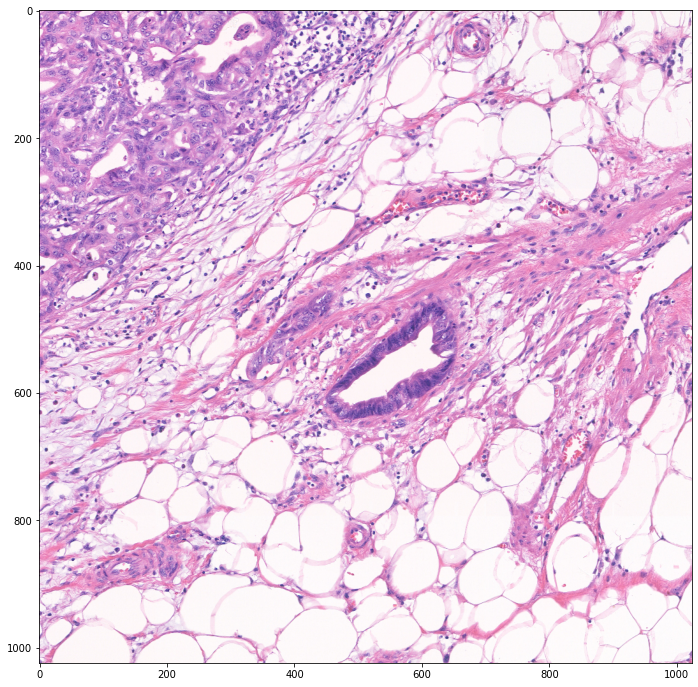

In [28]:
plt.figure(figsize=(12,12))
plt.imshow(temp_array)
plt.show()

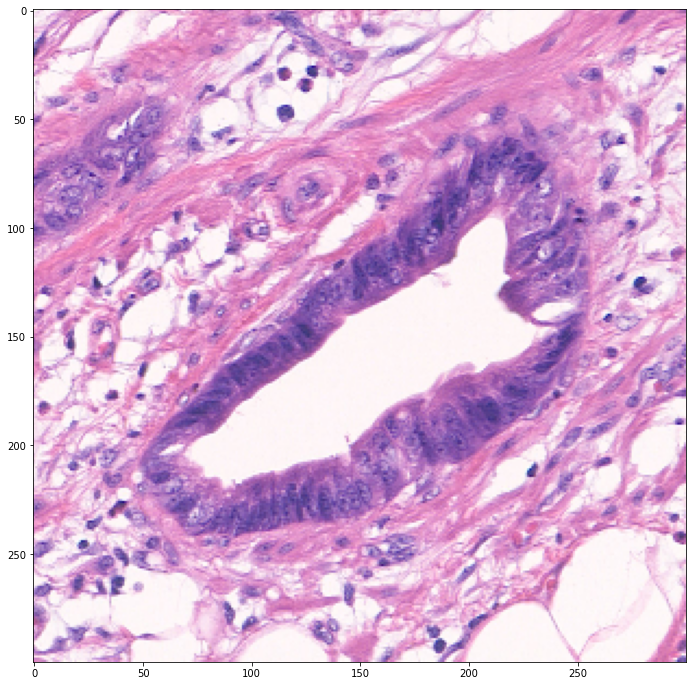

In [64]:
plt.figure(figsize=(12,12))
plt.imshow(temp_array[400:700,400:700])
plt.show()

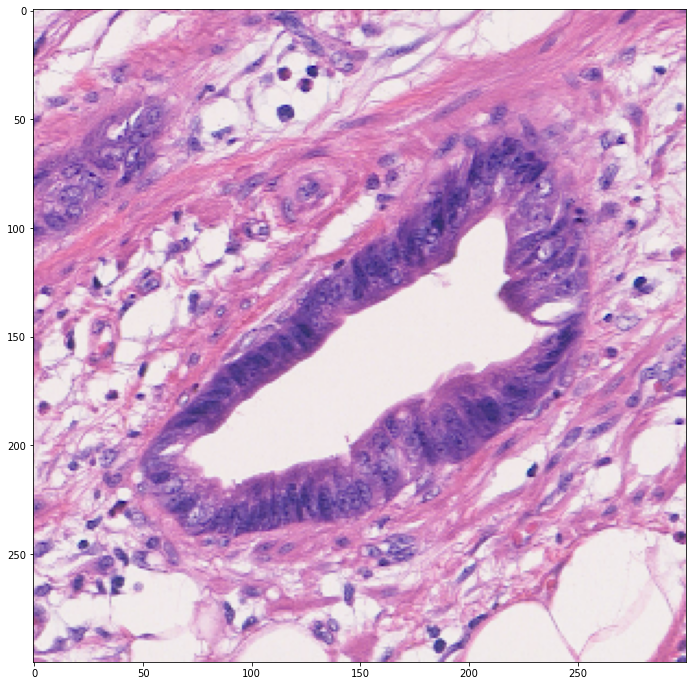

In [101]:
# argumented_array = A.GaussNoise(var_limit=(10, 50), p=1)(image=temp_array)["image"]
# argumented_array = A.Blur(blur_limit=(2,2), p=1)(image=temp_array)["image"]
# argumented_array = A.GaussianBlur(dq
plt.imshow(argumented_array[400:700,400:700])
plt.show()

In [87]:
import numpy as np

np.array_equal(argumented_array, temp_array)

True